In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv("./data_combined.csv")
df.head()

,location,ref,price,description,year
0,Xghajra,REF 571082,"256,000/Lm109,901",TERRACED HOUSE minutes walk from the promenade...,2016
1,Swieqi,REF 571088,"365,000/Lm156,695","TERRACED HOUSE in great area, having hall lead...",2016
2,Qormi,REF 571239,"300,000/Lm128,790","Highly finished elevated TERRACED HOUSE, consi...",2016
3,Msida,REF 570664,"186,300/Lm79,979","Corner, well kept TERRACED HOUSE comprising an...",2016
4,San Gwann,REF 571734,"210,000/Lm90,153",Corner TERRACED HOUSE comprising entrance hall...,2016


In [3]:
df['type'] = df['description'].apply(lambda description: ' '.join(re.findall(r'[A-Z]{2,}', str(description))))
df['type'] = df['type'].apply(lambda text: ' '.join(set(text.split())))


In [4]:
df.loc[df['type'].str.contains('PLOT', case=False, na=False), 'type'] = 'PLOT'
df.loc[df['type'].str.contains('APARTMENT', case=False, na=False), 'type'] = 'APARTMENT'
df.loc[df['type'].str.contains('HOUSE', case=False, na=False), 'type'] = 'HOUSE'
df.loc[df['type'].str.contains('VILLA', case=False, na=False), 'type'] = 'VILLA'
df.loc[df['type'].str.contains('MAISONETTE', case=False, na=False), 'type'] = 'MAISONETTE'
df.loc[df['type'].str.contains('PENTHOUSE', case=False, na=False), 'type'] = 'PENTHOUSE'
df.loc[df['type'].str.contains('GARAGE', case=False, na=False), 'type'] = 'GARAGE'
df.loc[df['type'].str.contains('COMMERCIAL', case=False, na=False), 'type'] = 'COMMERCIAL'
df.loc[df['type'].str.contains('FARM', case=False, na=False), 'type'] = 'FARM'
df.loc[df['type'].str.contains('BUSINESS PREMISES', case=False, na=False), 'type'] = 'COMMERCIAL'
df.loc[df['type'].str.contains('BUNGALOW', case=False, na=False), 'type'] = 'BUNGALOW'
df.loc[df['type'].str.contains('GROCERY', case=False, na=False), 'type'] = 'COMMERCIAL'
df.loc[df['type'].str.contains('SHOPS', case=False, na=False), 'type'] = 'COMMERCIAL'
df.loc[df['type'].str.contains('SITE', case=False, na=False), 'type'] = 'SITE'
df.loc[df['type'].str.contains('SHOP LAND', case=False, na=False), 'type'] = 'COMMERCIAL'
df.loc[df['type'].str.contains('EPC', case=False, na=False), 'type'] = 'COMMERCIAL'
df.loc[df['type'].str.contains('REF LAND EPC AIRSPACE', case=False, na=False), 'type'] = 'COMMERCIAL'


In [5]:
df['type'].unique()

array(['HOUSE', 'VILLA', 'MAISONETTE', 'APARTMENT', 'GARAGE', 'PLOT', '',
       'COMMERCIAL', 'FARM', 'PREMISES BUSINESS', 'OFFICE', 'BUNGALOW',
       'LAND', 'SITE', 'LAND SHOP'], dtype=object)

In [6]:
df = df[df['type'].isin(['HOUSE', 'VILLA', 'MAISONETTE', 'APARTMENT', 'BUNGALOW'])]

In [7]:
df['price'] = df['price'].str.split('/', expand=True)[0].str.replace(',', '')
df['price'] = df['price'].str.replace('€','')
df = df.query('price != "5350001701312"').copy()
df['price'] =df['price'].astype(int)

In [9]:
df['garage'] = df['description'].str.contains('garage')
df['balcony'] = df['description'].str.contains('balcony')
df['roof'] = df['description'].str.contains('roof')
df['garden'] = df['description'].str.contains('garden')

In [10]:
def extract_bedrooms(description):
    match = re.search(r'(\d+)(\s?.{0,6}?\s?)bedroom', description)
    return int(match.group(1)) if match else None

In [11]:
df['bedrooms'] = df['description'].apply(extract_bedrooms)
df = df[~pd.isna(df['bedrooms'])].copy()

In [12]:
df['location'] = df['location'].str.lstrip()
df['location'] = df['location'].str.rstrip()
df['location'] = df['location'].str.lower()

In [13]:
df['location'] = df['location'].replace('ghadira', 'mellieha')
df['location'] = df['location'].replace('m''scala', 'marsascala')
df['location'] = df['location'].replace('qajjenza', 'birzebbugia')
df['location'] = df['location'].replace('san pawl tat-targa', 'naxxar')
df['location'] = df['location'].replace('high ridge', 'swieqi')
df['location'] = df['location'].replace('ta giorni.', 'st julians')

In [14]:
df['location'].unique()

array(['xghajra', 'swieqi', 'qormi', 'msida', 'san gwann', 'kappara',
       'cospicua', 'fgura', 'attard', 'zejtun', 'mellieha', 'zabbar',
       'rabat', 'naxxar', 'st venera', 'birkirkara', 'kirkop', 'qrendi',
       'senglea', 'zebbug', 'tarxien', 'zurrieq', 'birzebbugia', 'dingli',
       'gharghur', 'g`mangia', 'hamrun', 'luqa', 'sliema', 'st julians',
       'paola', 'marsa', 'kalkara', 'lija', 'marsascala', 'mosta',
       'burmarrad', 'st pauls bay', 'swatar', 'siggiewi', 'gzira',
       'floriana', 'iklin', 'balzan', 'xemxija', 'bugibba', 'ghaxaq',
       'madliena', 'qawra', 'mriehel', 'mtarfa', 'pieta`', 'safi',
       'santa lucia', 'pembroke', 'marsaxlokk', 'gudja', 'mqabba',
       'blata l-bajda', 'salina', 'bahar ic-caghaq', 'mgarr', 'ta` xbiex',
       'birgu', 'ibrag', 'xlendi', 'birguma', 'victoria,gozo',
       'vittoriosa', "m'scala", 'valletta', 'gharb-gozo', 'kercem - gozo',
       'sannat, gozo', 'pieta', 'philips', 'manikata', 'fleur-de-lys'],
      dtype=obje

In [15]:
df = df.query('type !=""').copy()

In [16]:
avg_price_year_type = df.groupby(['year', 'type'])['price'].mean().reset_index().rename(columns={'price': 'avg_price_year_type'})
df = pd.merge(df, avg_price_year_type, on=['year', 'type'], how='left')

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(1714, 12)

In [19]:
df.head()

,location,ref,price,description,year,type,garage,balcony,roof,garden,bedrooms,avg_price_year_type
0,xghajra,REF 571082,256000,TERRACED HOUSE minutes walk from the promenade...,2016,HOUSE,True,True,True,False,3.0,183903.787879
1,swieqi,REF 571088,365000,"TERRACED HOUSE in great area, having hall lead...",2016,HOUSE,True,False,False,False,3.0,183903.787879
2,qormi,REF 571239,300000,"Highly finished elevated TERRACED HOUSE, consi...",2016,HOUSE,True,False,True,True,2.0,183903.787879
3,msida,REF 570664,186300,"Corner, well kept TERRACED HOUSE comprising an...",2016,HOUSE,False,True,True,False,3.0,183903.787879
4,san gwann,REF 571734,210000,Corner TERRACED HOUSE comprising entrance hall...,2016,HOUSE,False,True,True,False,3.0,183903.787879


In [20]:
df.drop(['ref', 'description'], axis=1, inplace=True)

In [21]:
df.to_csv('./data_cleaned.csv', index=None)

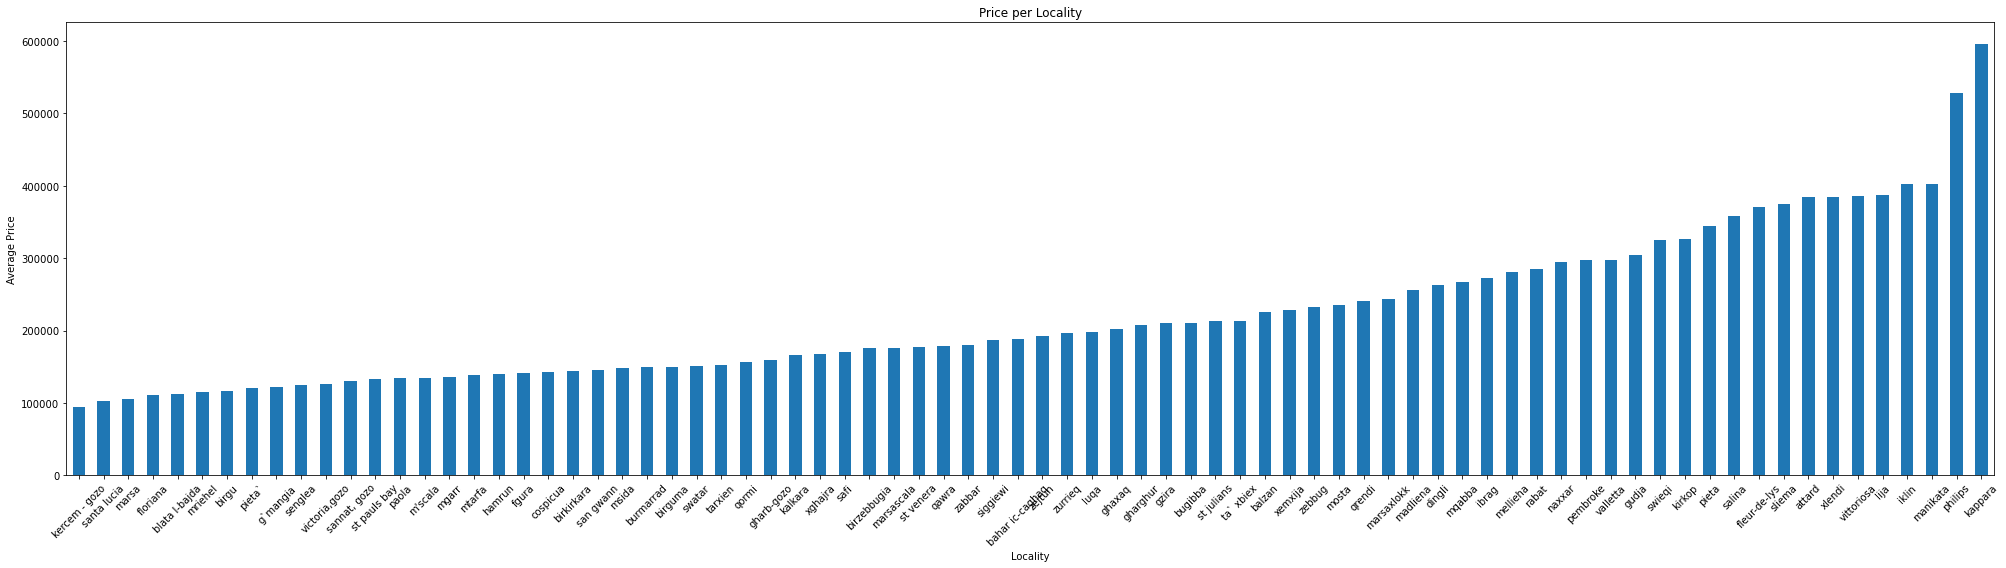

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot price per locality
plt.figure(figsize=(28, 8))
df.groupby('location')['price'].mean().sort_values().plot(kind='bar')
plt.xlabel('Locality')
plt.ylabel('Average Price')
plt.title('Price per Locality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

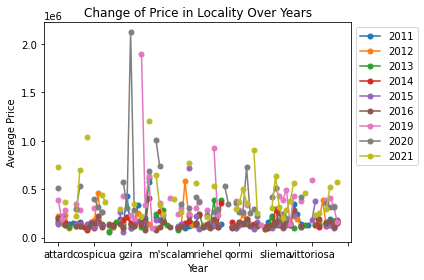

In [23]:
# Plot change of price in locality over years
plt.figure(figsize=(20, 10))
df.groupby(['location', 'year'])['price'].mean().unstack().plot(marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Change of Price in Locality Over Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

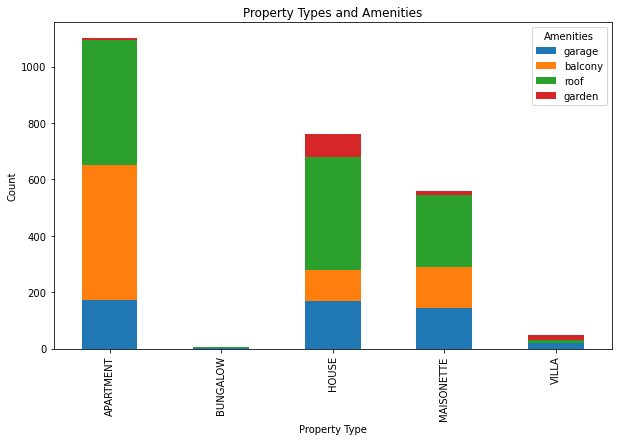

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data_cleaned.csv')

# Group the data by property type and count the number of observations
grouped = df.groupby('type').size()

# Select the relevant columns for the stacked bar chart
columns = ['garage', 'balcony', 'roof', 'garden']

# Calculate the count of each property type for each column
stacked_data = df.groupby('type')[columns].sum()

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the chart title and axes labels
plt.title('Property Types and Amenities')
plt.xlabel('Property Type')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Amenities', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


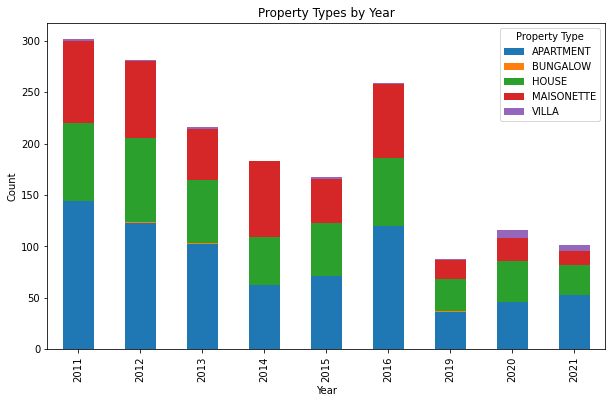

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data_cleaned.csv')

# Group the data by year and property type, and count the number of observations
grouped = df.groupby(['year', 'type']).size().unstack()

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the chart title and axes labels
plt.title('Property Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Property Type', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


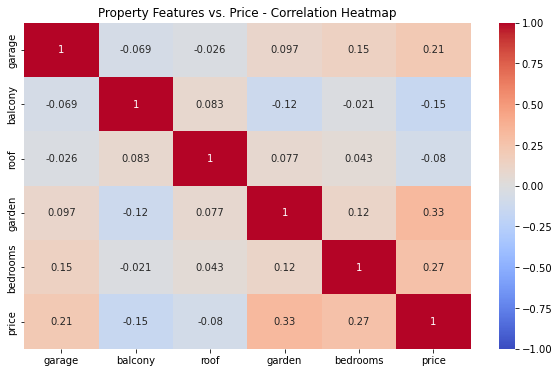

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data_cleaned.csv')

# Select the relevant columns for the heatmap
columns = ['garage', 'balcony', 'roof', 'garden', 'bedrooms', 'price']

# Compute the correlation matrix
corr_matrix = df[columns].corr()

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the chart title
plt.title('Property Features vs. Price - Correlation Heatmap')

# Show the plot
plt.show()

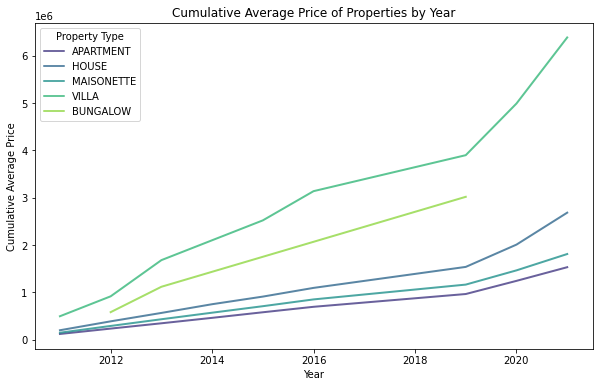

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data_cleaned.csv')

# Calculate the cumulative sum of the average price by year and type
grouped = df.groupby(['year', 'type'])['price'].mean().reset_index()
grouped['cumulative_avg_price'] = grouped.groupby('type')['price'].cumsum()

# Set the figure size
plt.figure(figsize=(10, 6))

# Generate the area chart
sns.lineplot(data=grouped, x='year', y='cumulative_avg_price', hue='type', 
             palette='viridis', lw=2, alpha=0.8)

# Set the chart title and axes labels
plt.title('Cumulative Average Price of Properties by Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Average Price')

# Display the legend
plt.legend(title='Property Type')

# Show the plot
plt.show()


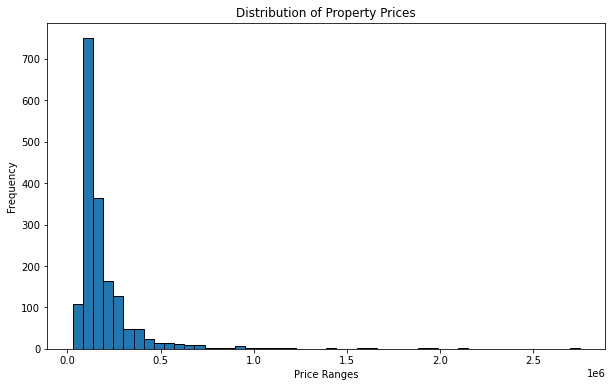

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data_cleaned.csv')

# Set the figure size
plt.figure(figsize=(10, 6))

# Generate the histogram with smaller price groups
plt.hist(df['price'], bins=50, edgecolor='black')

# Set the chart title and axes labels
plt.title('Distribution of Property Prices')
plt.xlabel('Price Ranges')
plt.ylabel('Frequency')

# Show the plot
plt.show()
